# Final Project for EESC G6901: Research Computing for the Earth Sciences
## Mercury in soils and Mercury deposition in the United States
### Jennifer Angel-Amaya


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import geopandas
from scipy.interpolate import griddata

%matplotlib inline



# Import the data

## Mercury Deposition

The MDN is the only network providing a longterm record of total mercury (Hg) concentration and deposition in precipitation in the United States and Canada. Atmospheric mercury deposition is a process through which various forms of mercury are removed from the atmosphere. The dry deposition of mercury mainly includes the direct deposition of Hg(0) and RGM (reactive gaseous mercury), which occurs throughout the year as long as it does not rain heavily. The forms of mercury in wet deposition tend to be soluble and granular Hg(II). Recent studies employing field monitoring and mercury isotopes showed that Hg(0) dry deposition far exceeds wet deposition by precipitation and the former can even be five times greater than the latter

The CSV files were downloaded from the Mercury Deposition Network (National Atmospheric Deposition Program) at https://nadp.slh.wisc.edu/networks/mercury-deposition-network/:
- "mdn_a" dataset contains the annual Hg Deposition (HgDep [μg/m^2]) from 1996 to 2021 (only complete data)
- "mdn_w" dataset contains the weekly Hg Deposition from (HgDep [ng/m^2])1996 to 2021 (only valid data)
- "mdn" dataset contains the site information for the 84 stations from the Mercury Deposition Network accross the US (including Inactive sites).

In [2]:
# Import site information from Mercury Deposition Network
mdn= pd.read_csv('mdn.csv') #Load as Dataframe  Mercury Deposition Network

# Set the Site ID as an index
mdn_i=mdn.set_index("siteId")
#mdn_i

In [3]:
# Import Annual Hg Deposition from Mercury Deposition Network
mdn_a= pd.read_csv('MDN-ALL-A-s.csv') 

# Set the Site ID as an index
mdn_ai=mdn_a.set_index("siteid") 
#mdn_ai

#combine in a single dataset the Annual HgDep data with the site coordinates
mdn_annual=mdn_ai.join(mdn_i, how="outer")
#mdn_annual

#Convert DataFrame to GeoDataFrame
mdn_annual_gdf = geopandas.GeoDataFrame(
    mdn_annual, geometry=geopandas.points_from_xy(mdn_annual.longitude, mdn_annual.latitude))

#Drop the -9 values in HgDep column from mdn_annual_gdf 
mdn_annual_gdf=mdn_annual_gdf[(mdn_annual_gdf.HgDep!=-9)] 

In [4]:
# # Import Weekly Hg Deposition from Mercury Deposition Network
# mdn_w= pd.read_csv('MDN-ALL-W-s.csv') #Load as Dataframe  Mercury Deposition Network

# # Set the Site ID as an index
# mdn_wi=mdn_w.set_index("siteID")
# #mdn_wi

# mdn_weekly=mdn_wi.join(mdn_i, how="outer")
# #mdn_weekly # use only weekly data?

## Mercury in soils

The CSV files were downloaded from the Geochemical and Mineralogical Data for Soils of the Conterminous United States (1 site per 1,600 square kilometers, 4,857 sites):
- 'Top 5' dataset contains the geochemical characterization first 5 cm, including Hg [mg/kg] collected during 2007-2011.
- 'Ahorizon' dataset contains the geochemical chatacterization A horizon, including Hg [mg/kg] collected during 2007-2011.
- 'Bhorizon' dataset contains the geochemical chatacterization B horizon, including Hg [mg/kg] collected during 2007-2011.

In [13]:
# Import Top 5cm Hg content in soils from USGS
Top5= pd.read_csv('Top5_soil.csv') 

# Set the Site ID as an index
Top5_i=Top5.set_index("SiteID") 
Top5_i = Top5_i.rename(columns={'Latitude': 'latitude', 'Longitude':'longitude'})
#Top5_i

#Convert DataFrame to GeoDataFrame
Top5_i_gdf = geopandas.GeoDataFrame(
    Top5_i, geometry=geopandas.points_from_xy(Top5_i.longitude, Top5_i.latitude))

Top5_i_gdf=Top5_i_gdf[Top5_i_gdf.Top5_Hg!='N.S.'] # Drop the N.S.  (no sample available) values
Top5_i_gdf = Top5_i_gdf.replace(['<0.01'], 0.01) # Replace the less than 0.01 for 0.01.


In [14]:
# # Import A horizon Hg content in soils from USGS
# Ahorizon= pd.read_csv('Ahorizon_soil.csv') 

# # Set the Site ID as an index
# Ahorizon_i=Ahorizon.set_index("SiteID") 
# #Ahorizon_i

# # Import C horizon Hg content in soils from USGS
# Chorizon= pd.read_csv('Chorizon_soil.csv') 

# # Set the Site ID as an index
# Chorizon_i=Chorizon.set_index("SiteID") 
# #Chorizon_i

## Figure 1. Mercury Deposition Network and Soil monitoring sites

In [15]:
def plot_us(gdf):
    # define map extent
    extent = [-170, -50, 8, 80]

    # better projection
    proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

    # create axes
    fig, ax1 = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
    ax1.set_extent(extent)
    ax1.add_feature(cfeature.OCEAN);
    ax1.add_feature(cfeature.STATES, edgecolor='black', zorder=10)
    
    #plot data
    ax1.scatter(gdf.longitude, gdf.latitude, transform=ccrs.PlateCarree(),color='red', s=2);
    
    ax1.set_title(' ') #Add title??
    ax1.gridlines()

'Mercury Deposition Network'

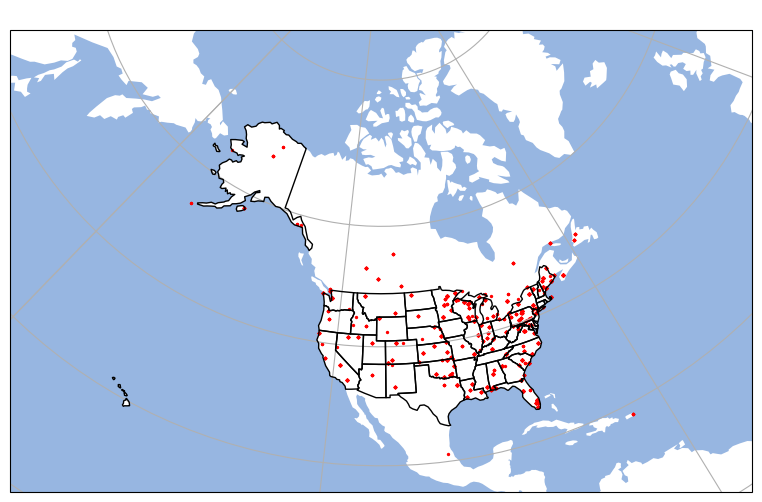

In [16]:
plot_us(mdn_annual_gdf)
'Mercury Deposition Network'

'Soils sampling sites - USGS'

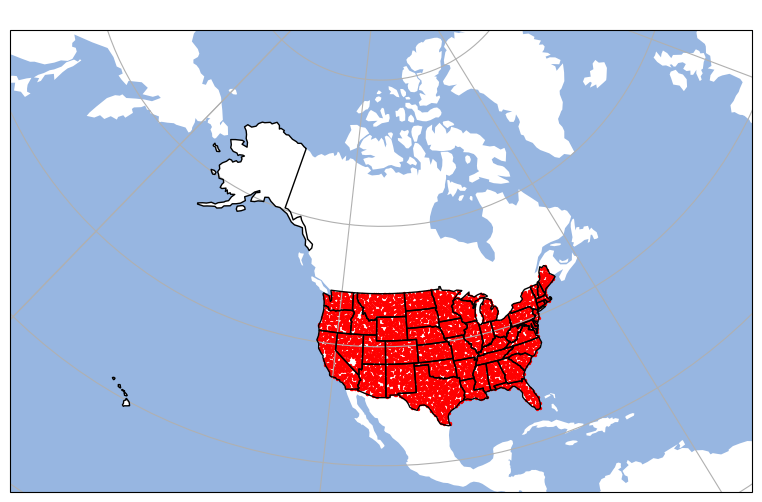

In [17]:
plot_us(Top5_i_gdf) 
('Soils sampling sites - USGS')

# Mercury Deposited from the Atmosphere

## Mercury deposited between 1996-2021

In [18]:
mdn_annual_gdf.HgDep.nlargest(20)

PR20    30.946
PA37    29.063
FL11    28.867
FL04    28.794
PR20    28.104
AL02    27.383
FL34    27.066
FL11    26.839
FL97    25.807
PR20    25.661
FL97    24.964
MS22    24.328
FL97    23.928
FL97    23.042
FL11    22.862
AL02    22.840
FL34    22.471
MO46    22.368
AL19    22.117
FL34    22.109
Name: HgDep, dtype: float64

<AxesSubplot: xlabel='stateName'>

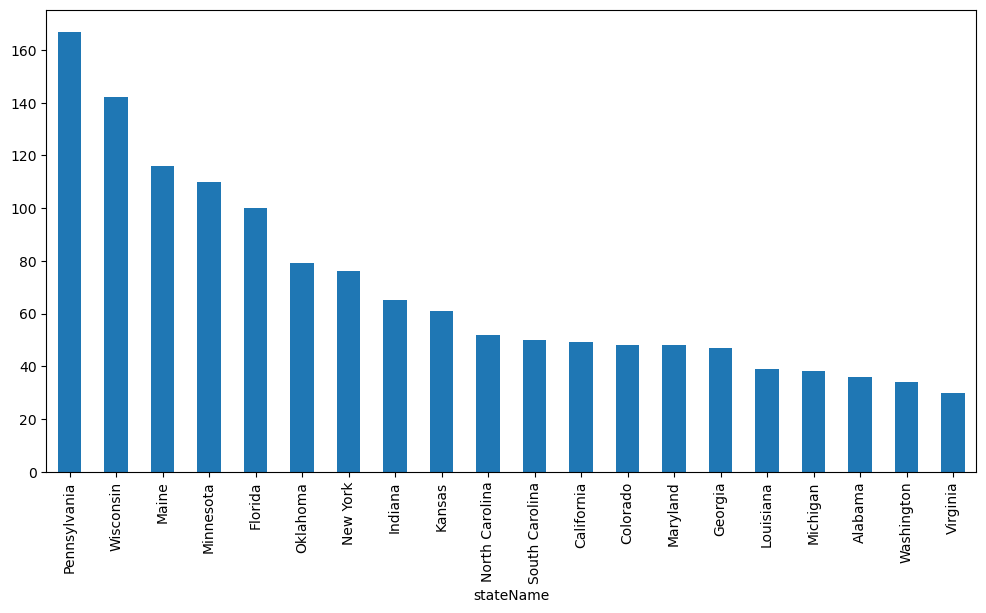

In [19]:
mdn_annual_gdf.groupby('stateName').HgDep.count().nlargest(20).plot(kind='bar', figsize=(12,6))

In [20]:
gb = mdn_annual_gdf.groupby('stateName')

gb.HgDep.max().nlargest(10)

stateName
Puerto Rico     30.946
Pennsylvania    29.063
Florida         28.867
Alabama         27.383
Mississippi     24.328
Missouri        22.368
Louisiana       21.903
Indiana         20.245
Tennessee       20.072
Georgia         19.295
Name: HgDep, dtype: float64

In [21]:
gb.HgDep.mean().nlargest(10)

stateName
Puerto Rico    23.906000
Florida        17.943410
Mississippi    16.252143
Alabama        15.521222
Louisiana      14.840256
Tennessee      13.866600
Missouri       13.382750
Hidalgo        12.287000
Georgia        12.142787
Oklahoma       11.528063
Name: HgDep, dtype: float64

<AxesSubplot: xlabel='stateName'>

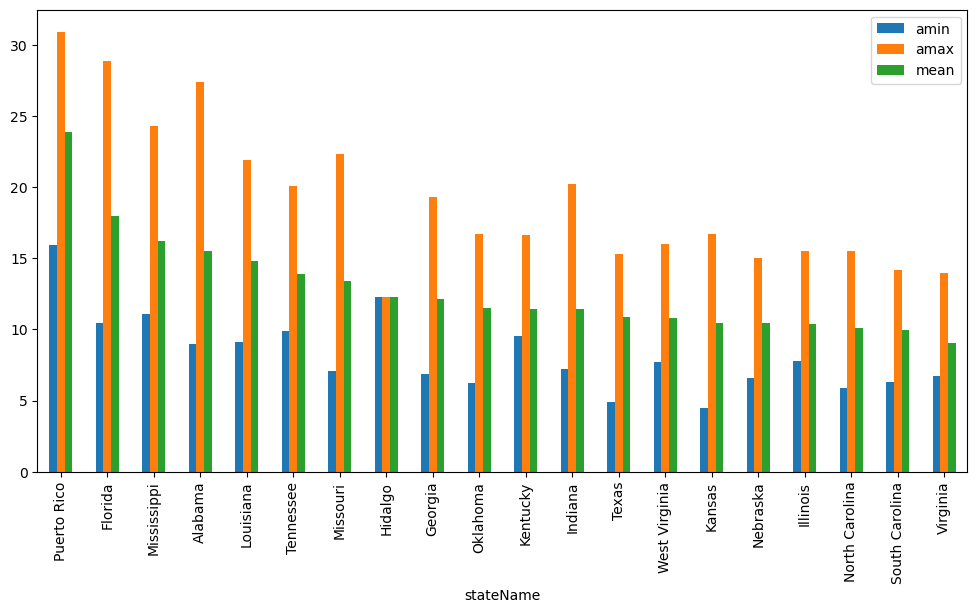

In [22]:
gb.HgDep.aggregate([np.min, np.max, np.mean]).nlargest(20, 'mean').plot(kind='bar',figsize=(12,6))

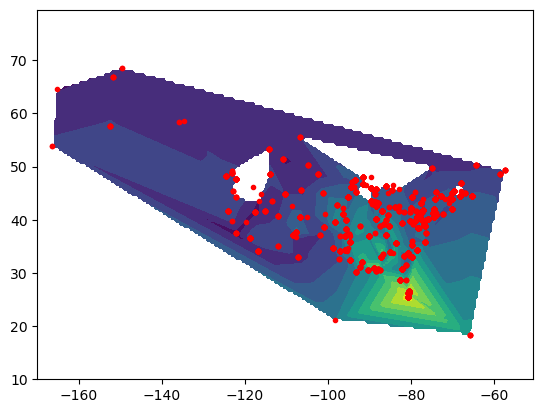

In [23]:
x=np.arange(-170,-50,0.5)
y=np.arange(10,80,0.5)

xx, yy = np.meshgrid(x, y) # arbitrary grid

# interpolate
HgDep_map_gdf = griddata((mdn_annual_gdf.longitude,mdn_annual_gdf.latitude),mdn_annual_gdf.HgDep,(xx, yy),method='linear')

#plot

fig = plt.figure()
#ax = fig.add_subplot()
plt.contourf(xx,yy,HgDep_map_gdf,10)
plt.plot(mdn_annual_gdf.longitude, mdn_annual_gdf.latitude,marker='.', linestyle=' ',color='red');

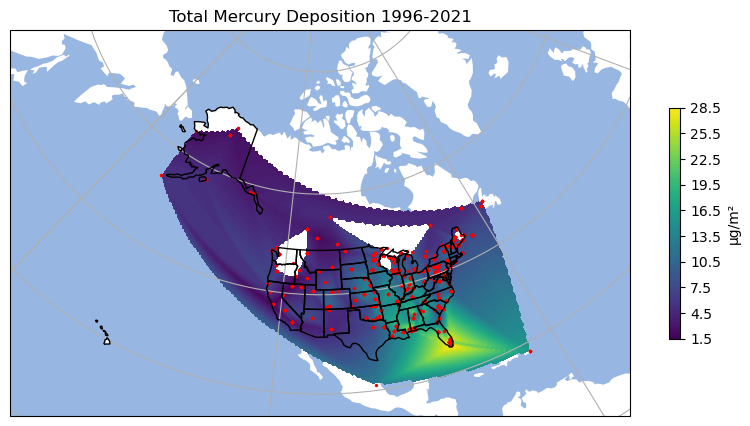

In [24]:
# define map extent
extent = [-170, -50, 8, 80]

# better projection
proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

# plot
fig,ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
# setup map
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN);
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

# Plot monitoring sites Mercury deposition

HgDep_map=ax.contourf(xx,yy,HgDep_map_gdf,100, transform=ccrs.PlateCarree())
ax.scatter(mdn_annual_gdf.longitude, mdn_annual_gdf.latitude, color='red', transform=ccrs.PlateCarree(), s=2);

# decorate
ax.set_title('Total Mercury Deposition 1996-2021')
ax.gridlines()
plt.colorbar(HgDep_map,shrink=0.5, label='µg/m²')


In [25]:
# # download US boundary shape file from here: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html, 
# # read the shp file with GeoPandas
# nation_gdf = geopandas.read_file('cb_2021_us_nation_5m.shp')

# #set the CRS of the mdn_annual_gdf to the same CRS as nation_gdf
# HgDep_map.crs = nation_gdf.crs

# #clip the mdn_annual_gdf using the clip() function from GeoPandas
# mdn_annual_nation_gdf = HgDep_map.clip(nation_gdf.geometry[nation_gdf.NAME=='United States'])

# Hg in soils

## Hg in soils sampled between 2007 - 2011

<AxesSubplot: xlabel='LandCover1'>

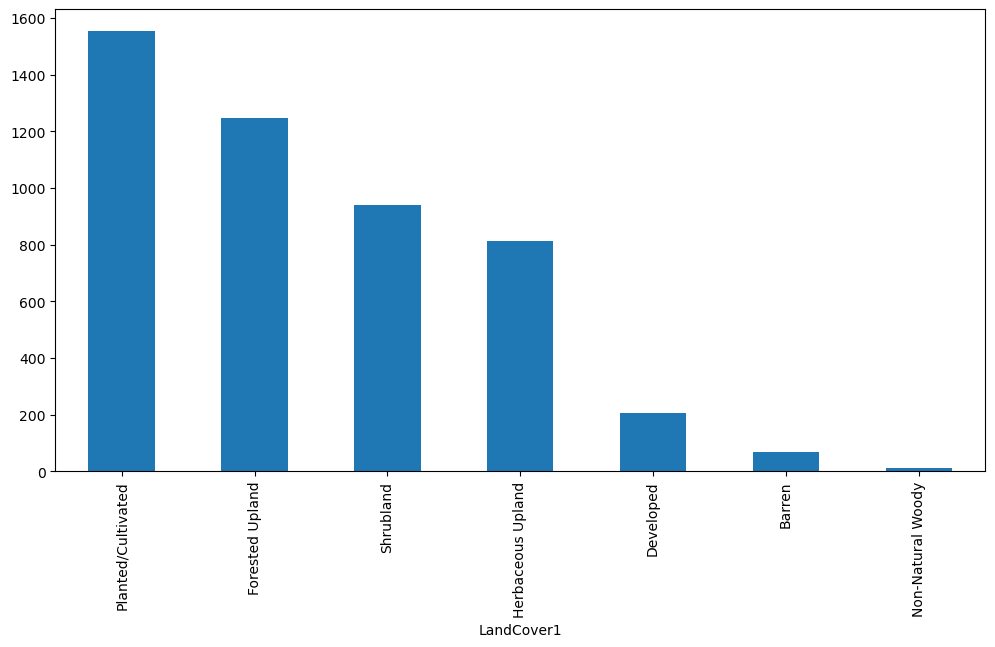

In [26]:
Top5_i_gdf.groupby('LandCover1').Top5_Hg.count().nlargest(7).plot(kind='bar', figsize=(12,6)) # How to use a sub-category for land cover??

<AxesSubplot: xlabel='StateID'>

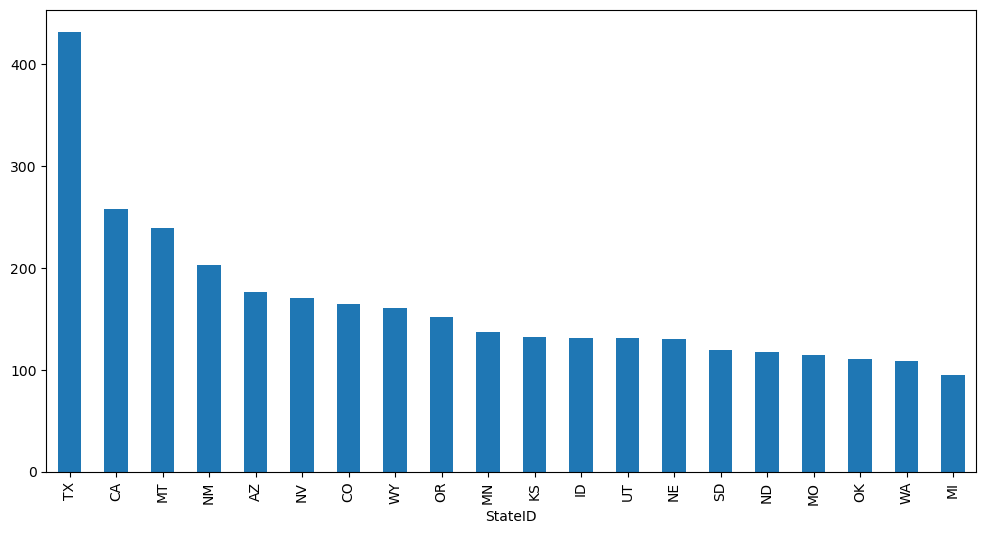

In [27]:
Top5_i_gdf.groupby('StateID').Top5_Hg.count().nlargest(20).plot(kind='bar', figsize=(12,6))

In [28]:
Top5_i_gdf["Top5_Hg"] = pd.to_numeric(Top5_i_gdf["Top5_Hg"])
gb = Top5_i_gdf.groupby('StateID')
#gb.Top5_Hg.aggregate(np.max)
gb.Top5_Hg.max().nlargest(10)

StateID
NV    56.40
LA     4.43
CA     2.25
CO     1.30
WA     0.69
NY     0.52
MA     0.47
MT     0.46
PA     0.40
CT     0.39
Name: Top5_Hg, dtype: float64

<AxesSubplot: xlabel='StateID'>

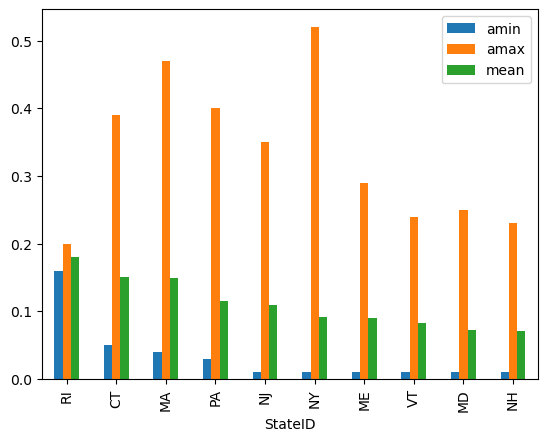

In [29]:
Top5_Hg=Top5_i_gdf[(Top5_i_gdf.Top5_Hg!=56.40)&(Top5_i_gdf.Top5_Hg!=4.43)] 
gb = Top5_Hg.groupby('StateID')
gb.Top5_Hg.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')


<AxesSubplot: xlabel='LandCover1,SiteID'>

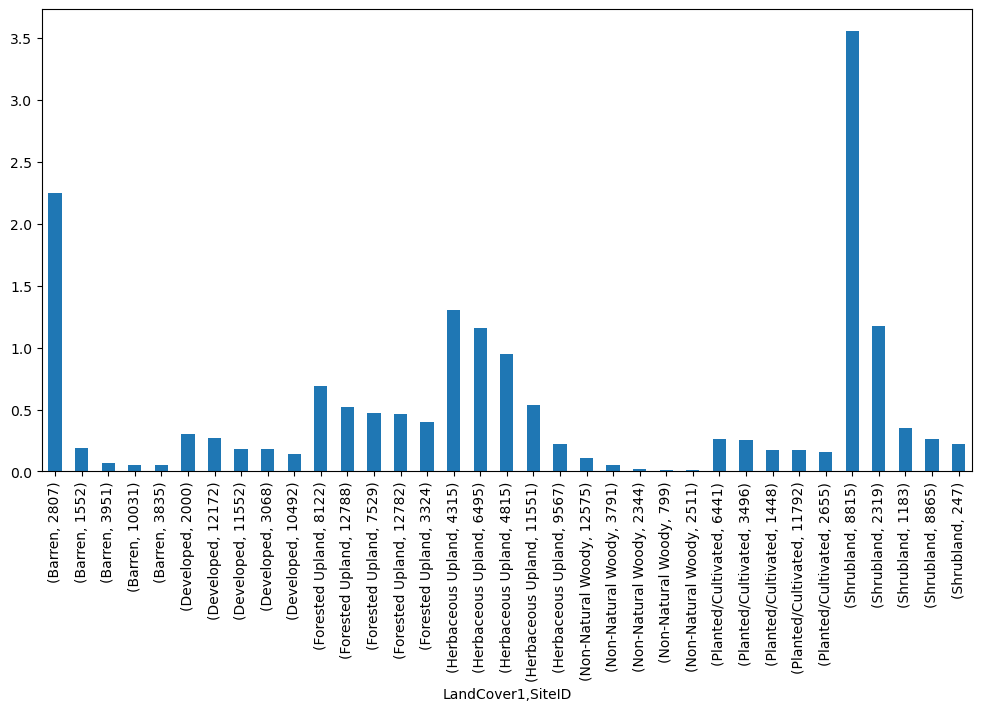

In [30]:
Top5_Hg.groupby('LandCover1').Top5_Hg.nlargest(5).plot(kind='bar', figsize=(12,6)) #HOw to consider only land cover, no SiteID BOXPLOT??

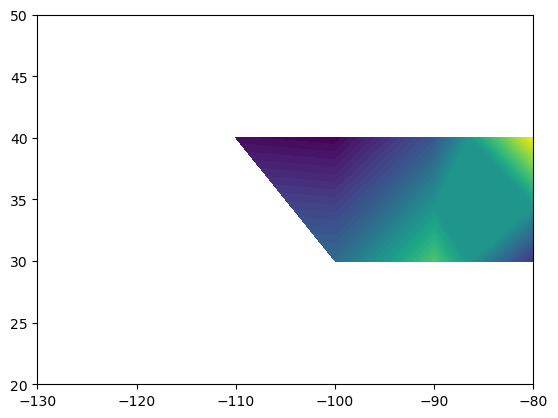

In [31]:
x=np.arange(-130,-70,10)
y=np.arange(20,52,10)


xx, yy = np.meshgrid(x, y) # arbitrary grid

# interpolate
HgSol_map_gdf = griddata((Top5_i_gdf.longitude,Top5_i_gdf.latitude),Top5_i_gdf.Top5_Hg,(xx, yy),method='linear')

#plot

fig = plt.figure()
#ax = fig.add_subplot()
plt.contourf(xx,yy,HgSol_map_gdf,50)
#plt.plot(Top5_i_gdf.longitude, Top5_i_gdf.latitude,marker='.', linestyle=' ',color='red');

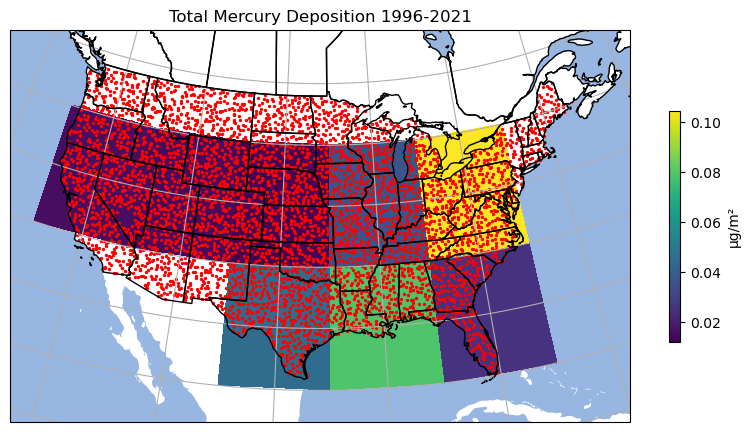

In [32]:
# define map extent
extent = [-122, -70, 20, 52]

# better projection
proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

# plot
fig,ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
# setup map
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN);
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)



# interpolate
HgSol_map=ax.pcolormesh(xx,yy,HgSol_map_gdf, transform=ccrs.PlateCarree())

# # Plot monitoring sites Mercury deposition
ax.scatter(Top5_i_gdf.longitude, Top5_i_gdf.latitude, color='red', transform=ccrs.PlateCarree(), s=2);

# decorate
ax.set_title('Total Mercury Deposition 1996-2021')
ax.gridlines()
plt.colorbar(HgSol_map,shrink=0.5, label='µg/m²')

### Hg Sourcing

![Hg sourcing](Hg_parental.jpg)

# Hg in soil and Hg deposition relationship

## Load Cartographic Boundary Data from the US Census and Clip data

In [42]:
# download US boundary shape file from here: https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html, 
# read the shp file with GeoPandas
nation_gdf = geopandas.read_file('cb_2021_us_nation_5m.shp')

#set the CRS of the mdn_annual_gdf to the same CRS as nation_gdf
mdn_annual_gdf.crs = nation_gdf.crs

#clip the mdn_annual_gdf using the clip() function from GeoPandas
mdn_annual_nation_gdf = mdn_annual_gdf.clip(nation_gdf.geometry[nation_gdf.NAME=='United States'])

#Drop the values in HgDep column from mdn_annual_gdf outside the conterminous US
mdn_annual_UScon = mdn_annual_nation_gdf[(mdn_annual_nation_gdf["state"] !='AK')& (mdn_annual_nation_gdf["state"] !='PR')]


In [43]:
HgDep=mdn_annual_UScon[mdn_annual_UScon['yr']<2011] # If only use datapoints measured before 2011 to compare with Hg soils

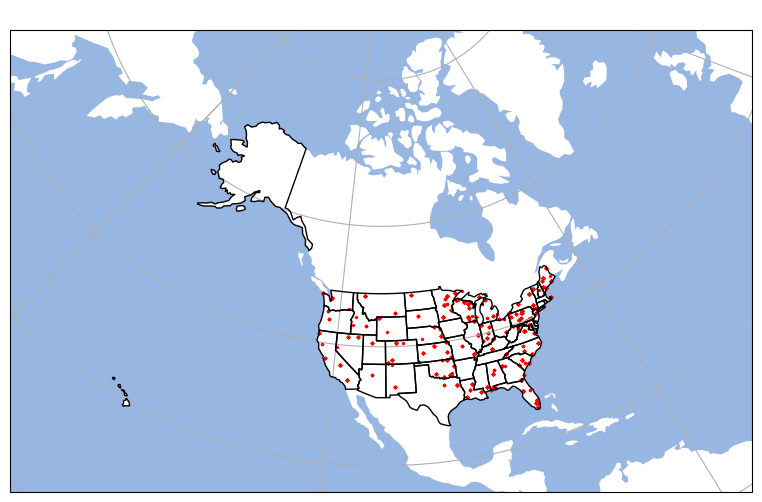

In [44]:
plot_us(mdn_annual_UScon) #Data points within the contermininous US (excluding Alaska and Puerto Rico)

## Interpolation

In [45]:
x=np.arange(-170,-50,0.25)
y=np.arange(10,80,0.25)

xx, yy = np.meshgrid(x, y) # arbitrary grid

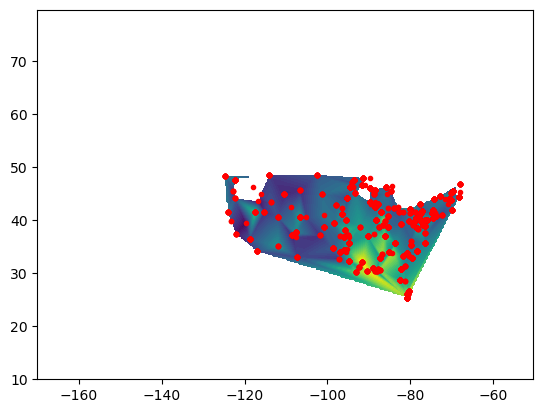

In [46]:
# interpolate
HgDep_map_gdf = griddata((mdn_annual_UScon.longitude,mdn_annual_UScon.latitude),mdn_annual_UScon.HgDep,(xx, yy),method='linear') #Why cubic doesn't work??

#plot

fig = plt.figure()
plt.contourf(xx,yy,HgDep_map_gdf,50)
plt.plot(mdn_annual_UScon.longitude, mdn_annual_UScon.latitude,marker='.', linestyle=' ',color='red');

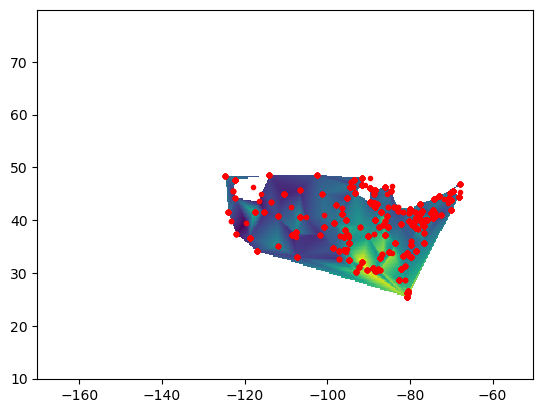

In [47]:
# interpolate
HgDep_map_gdf = griddata((mdn_annual_UScon.longitude,mdn_annual_UScon.latitude),mdn_annual_UScon.HgDep,(xx, yy),method='linear') #Why cubic doesn't work??

#plot

fig = plt.figure()
plt.pcolormesh(xx,yy,HgDep_map_gdf)
plt.plot(mdn_annual_UScon.longitude, mdn_annual_UScon.latitude,marker='.', linestyle=' ',color='red');

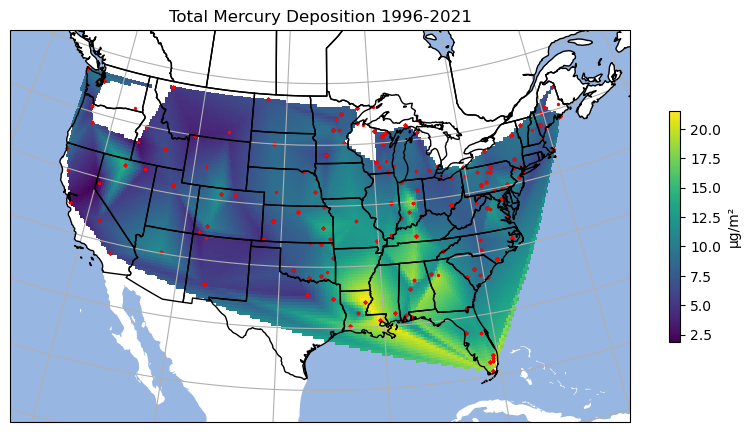

In [48]:
# define map extent
extent = [-122, -70, 20, 52]

# better projection
proj = ccrs.LambertConformal(central_longitude=np.mean(extent[:2]), central_latitude=np.mean(extent[2:]))

# plot
fig,ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': proj})
# setup map
ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN);
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)



# interpolate
HgDep_map=ax.pcolormesh(xx,yy,HgDep_map_gdf, transform=ccrs.PlateCarree())

# Plot monitoring sites Mercury deposition
ax.scatter(mdn_annual_UScon.longitude, mdn_annual_UScon.latitude, color='red', transform=ccrs.PlateCarree(), s=2);

# decorate
ax.set_title('Total Mercury Deposition 1996-2021')
ax.gridlines()
plt.colorbar(HgDep_map,shrink=0.5, label='µg/m²')



In [49]:
mdn_annual_UScon.HgDep.nlargest(10) #Why is no PA37 obvious??

PA37    29.063
FL11    28.867
FL04    28.794
AL02    27.383
FL34    27.066
FL11    26.839
FL97    25.807
FL97    24.964
MS22    24.328
FL97    23.928
Name: HgDep, dtype: float64

In [41]:
#HOw to calculate the difference between the 2 datasets?